# basic operaton

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable

torch.Tensor([[3,4],[2,3]])


 3  4
 2  3
[torch.FloatTensor of size 2x2]

In [2]:
Variable(torch.Tensor([[3,4],[2,3]]))

Variable containing:
 3  4
 2  3
[torch.FloatTensor of size 2x2]

In [3]:
x = Variable(torch.Tensor([2]), requires_grad=True)
y = x ** 2 + 5
y.backward()

x, x.grad  # x = 2, dy/dx = 2 * x = 4

(Variable containing:
  2
 [torch.FloatTensor of size 1], Variable containing:
  4
 [torch.FloatTensor of size 1])

In [4]:
x = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([5]))
y = x ** 2 + b
y.backward()

print(x)
print(x.grad)
print(b)
print(b.grad)

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 4
[torch.FloatTensor of size 1]

Variable containing:
 5
[torch.FloatTensor of size 1]

None


# Linear Regression

In [5]:
learning_rate = 0.001
num_epocs = 50

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # y = w0 + w1 * x1
    
    def forward(self, x):
        x = self.linear(x)
        return x
    
    def get_weights(self):
        return [self.linear.bias.data.numpy(), self.linear.weight.data.numpy()]

model = LinearRegression()
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
import numpy as np

x = data["RM"].values[:,np.newaxis].astype(np.float32)
y = data["PRICE"].values[:,np.newaxis].astype(np.float32)

for i in range(num_epocs):
    inputs = Variable(torch.from_numpy(x))
    targets = Variable(torch.from_numpy(y))

    # Clear grad
    optimizer.zero_grad()

    # Forward
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    print("%d: %lf" % (i, loss.data[0]))

    # Backward and calculate gradients
    loss.backward()

    # Update weights
    optimizer.step()

0: 497.427094
1: 428.411774
2: 370.245819
3: 321.222717
4: 279.905548
5: 245.082916
6: 215.734161
7: 190.998672
8: 170.151260
9: 152.580994
10: 137.772308
11: 125.291443
12: 114.772346
13: 105.906662
14: 98.434456
15: 92.136673
16: 86.828888
17: 82.355179
18: 78.584702
19: 75.406807
20: 72.728279
21: 70.470726
22: 68.567894
23: 66.964073
24: 65.612236
25: 64.472855
26: 63.512394
27: 62.702824
28: 62.020401
29: 61.445168
30: 60.960197
31: 60.551373
32: 60.206707
33: 59.916100
34: 59.671066
35: 59.464417
36: 59.290154
37: 59.143188
38: 59.019192
39: 58.914589
40: 58.826302
41: 58.751770
42: 58.688866
43: 58.635731
44: 58.590878
45: 58.552914
46: 58.520817
47: 58.493641
48: 58.470646
49: 58.451172


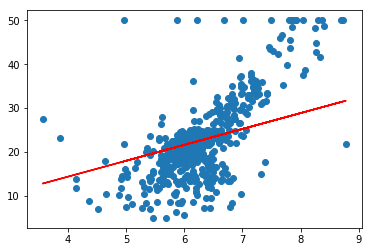

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y)

w0, w1 = model.get_weights()
plt.plot(x, w1 * x + w0, c='red')

In [11]:
x = data.iloc[:, :3].values.astype(np.float32)
y = data["PRICE"].values[:,np.newaxis].astype(np.float32)

class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1)
    
    def forward(self, x):
        x = self.linear(x)
        return x

model = MultipleLinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(num_epocs):
    inputs = Variable(torch.from_numpy(x))
    targets = Variable(torch.from_numpy(y))

    # Clear grad
    optimizer.zero_grad()

    # Forward
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and calculate gradients
    loss.backward()

    # Update weights
    optimizer.step()
    print("%d: %lf" % (i, loss.data[0]))

0: 614.040588
1: 347.113190
2: 249.713623
3: 212.412521
4: 196.841354
5: 189.396240
6: 185.191910
7: 182.431747
8: 180.423279
9: 178.873886
10: 177.643051
11: 176.649658
12: 175.840927
13: 175.178558
14: 174.632706
15: 174.180283
16: 173.802719
17: 173.485779
18: 173.216873
19: 172.986893
20: 172.788208
21: 172.614426
22: 172.460892
23: 172.323822
24: 172.199585
25: 172.085831
26: 171.980667
27: 171.882217
28: 171.789215
29: 171.700485
30: 171.615402
31: 171.533081
32: 171.453217
33: 171.375092
34: 171.298584
35: 171.223221
36: 171.148880
37: 171.075226
38: 171.002457
39: 170.929962
40: 170.858032
41: 170.786392
42: 170.715088
43: 170.644104
44: 170.573273
45: 170.502518
46: 170.432083
47: 170.361694
48: 170.291428
49: 170.221161


# Convolution Neural Network

In [12]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) # 1ch x 28 x 28 -> 10ch x 12 x 12
        x = F.relu(F.max_pool2d(self.conv2(x), 2)) # 10x12x12 -> 20x4x4
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
from torch import nn
from torch import optim
from torchvision import datasets, transforms
from torch.autograd import Variable

pre_processor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

data_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=pre_processor),
    batch_size=5, shuffle=True)

In [14]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [15]:
def train():
    model.train()
    for data, target in data_loader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
    
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

num_epocs = 3
for i in range(num_epocs):
    train()

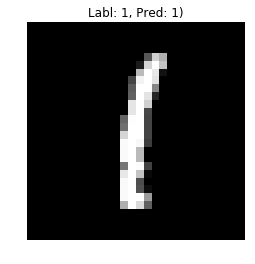

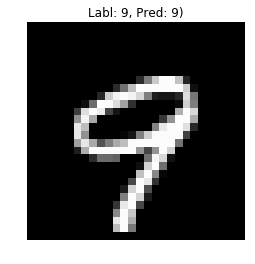

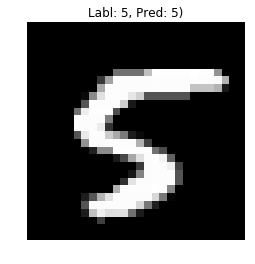

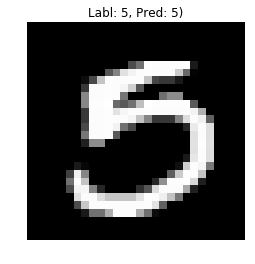

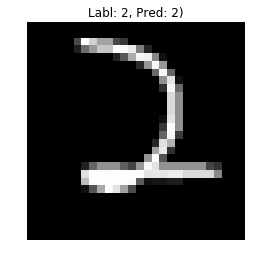

In [16]:
def test():
    data, target = iter(data_loader).next()
    images = data.numpy().transpose([0,2,3,1]) * 0.3081 + 0.1307        
    data, target = Variable(data), Variable(target)

    model.eval()
    output = model(data)  
    pred = output.data.max(1)[1] # tensor.data.max = [score, max_index]

    for i in range(5):
        image = np.squeeze(images[i])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Labl: %d, Pred: %d)" % (target[i].data[0], pred[i]))
        plt.show()        

test()

In [17]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(10, 10, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(20, 20, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        
        self.fc = nn.Sequential(
            nn.Linear(20*7*7, 50),
            nn.Linear(50, 10),
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(-1, 20*7*7)
        x = self.fc(x)
        return x

CNN2()

CNN2(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=980, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [18]:
model = CNN2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

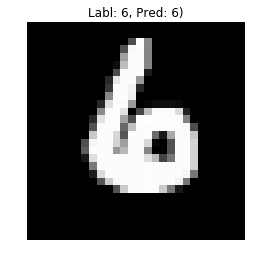

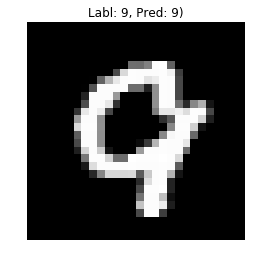

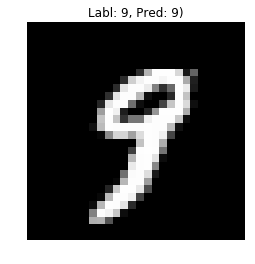

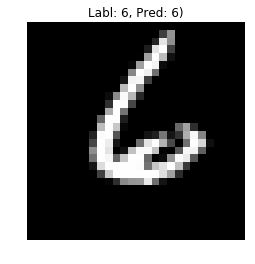

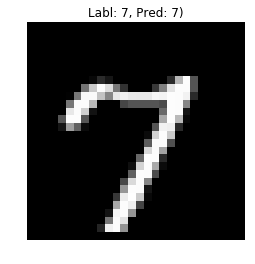

In [19]:
num_epocs = 2
for i in range(num_epocs):
    train()
test()